# Справочник класса WOE
## Создание экземпляра класса

In [1]:
import pandas as pd
from scorekit import DataSamples
from scorekit import WOE

ds = DataSamples(samples={'train': pd.read_csv('data/train_titanic.csv')}, target='Survived', result_folder='titanic_output')

binning = WOE(ds,                                # ДатаСэмпл, для которого будут рассчитываться биннинги
              features=None,                     # список переменных. При None берется ds.features
              scorecard=None,                    # путь к эксель файлу или датафрейм с готовыми биннингами для импорта
              round_digits=3,                    # округление границ бинов до этого числа знаков после запятой.
                                                 # При округлении происходит проверка на долю мигрирующих наблюдений. Если округление приедет к миграции большой доли наблюдений,
                                                 # то round_digits увеличивается до тех пор, пока доля не упадет ниже rounding_migration_coef
              rounding_migration_coef=0.005,     # максимально допустимая доля наблюдений для миграции между бинами при округлении
              # ---Параметры для расчета WOE---
              simple=True,                       # если True, то расчет WOE происходит на трэйн сэмпле, иначе берется среднее значение по фолдам
              n_folds=5,                         # кол-во фолдов для расчета WOE при simple=False
              woe_adjust=0.5,                    # корректировочный параметр для расчета EventRate_i в бине i                                                
              alpha=0,                           # коэффициент регуляризации для расчета WOE
              alpha_range=None,                  # если alpha=None, то подбирается оптимальное значение alpha из диапазона alpha_range. При None берется диапазон range(10, 100, 10)
              alpha_scoring='neg_log_loss',      # метрика, используемая для оптимизации alpha
              alpha_best_criterion='min',        # 'min' - минимизация метрики alpha_scoring, 'max' - максимизация метрики
              missing_process='max_or_separate', # способ обработки пустых значений:
                                                 #     'separate' - помещать в отдельный бин
                                                 #     'min' - объединять с бином с минимальным WOE
                                                 #     'max' - объединять с бином с максимальным WOE
                                                 #     'nearest' - объединять с ближайшим по WOE биномом
                                                 #     'min_or_separate' - если доля пустых значений меньше missing_min_part, то объединять с бином с минимальным WOE, иначе помещать в отдельный бин
                                                 #     'max_or_separate' - если доля пустых значений меньше missing_min_part, то объединять с бином с максимальным WOE, иначе помещать в отдельный бин
                                                 #     'nearest_or_separate' - если доля пустых значений меньше missing_min_part, то объединять с ближайшим по WOE бином, иначе помещать в отдельный бин
              missing_min_part=0.01,             # минимальная доля пустых значений для выделения отдельного бина при missing_process 'min_or_separate', 'max_or_separate' или 'nearest_or_separate'
              others='missing_or_max',           # Способ обработки значений, не попавших в биннинг:
                                                 #     'min': остальным значениям присваивается минимальный WOE
                                                 #     'max': остальным значениям присваивается максимальный WOE
                                                 #     'missing_or_min': если есть бакет с пустыми значениями, то остальным значениям присваивается его WOE, иначе минимальный WOE
                                                 #     'missing_or_max': если есть бакет с пустыми значениями, то остальным значениям присваивается его WOE, иначе максимальный WOE
                                                 #     float: отсутствующим значениям присваивается заданный фиксированный WOE
              opposite_sign_to_others=False,      # В случае, когда непрерывная переменная на выборке для разработки имеет только один знак,
                                                 # то все значения с противоположным знаком относить к others
             )

Selected features: ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Selected categorical features: ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']


## 1. Переменные

In [2]:
# биннинги для каждой переменной
binning.feature_woes 

{'PassengerId': <vtb_scorekit.woe.base.FeatureWOE at 0x7f4d41772f50>,
 'Pclass': <vtb_scorekit.woe.base.FeatureWOE at 0x7f4b1da836d0>,
 'Sex': <vtb_scorekit.woe.base.FeatureWOE at 0x7f4b1da25c90>,
 'Age': <vtb_scorekit.woe.base.FeatureWOE at 0x7f4d5cfc5f50>,
 'SibSp': <vtb_scorekit.woe.base.FeatureWOE at 0x7f4b1da467d0>,
 'Parch': <vtb_scorekit.woe.base.FeatureWOE at 0x7f4b1da46bd0>,
 'Fare': <vtb_scorekit.woe.base.FeatureWOE at 0x7f4b1da46850>,
 'Embarked': <vtb_scorekit.woe.base.FeatureWOE at 0x7f4b1d9d6990>}

In [3]:
# список параметров для расчета WOE
binning.round_digits
binning.round_woe
binning.rounding_migration_coef
binning.simple
binning.n_folds
binning.woe_adjust
binning.alpha
binning.alpha_range 
binning.alpha_scoring
binning.alpha_best_criterion
binning.missing_process
binning.missing_min_part
binning.others
binning.opposite_sign_to_others

False

In [4]:
# вспомогательный ДатаСэмпл, содержащий поле со срезами
binning.ds_aux 

In [5]:
# биннинги для кросс-переменных
binning.feature_crosses 

{}

In [6]:
# сет из доступных кросс-переменных
binning.cross_features

set()

## 2. Методы

In [7]:
"""
Создание объекта класса FeatureWOE
:param ds: ДатаСэмпл для обработки
:param f: переменная

:return: FeatureWOE
"""
binning.create_feature_woe(ds, f='Age')         

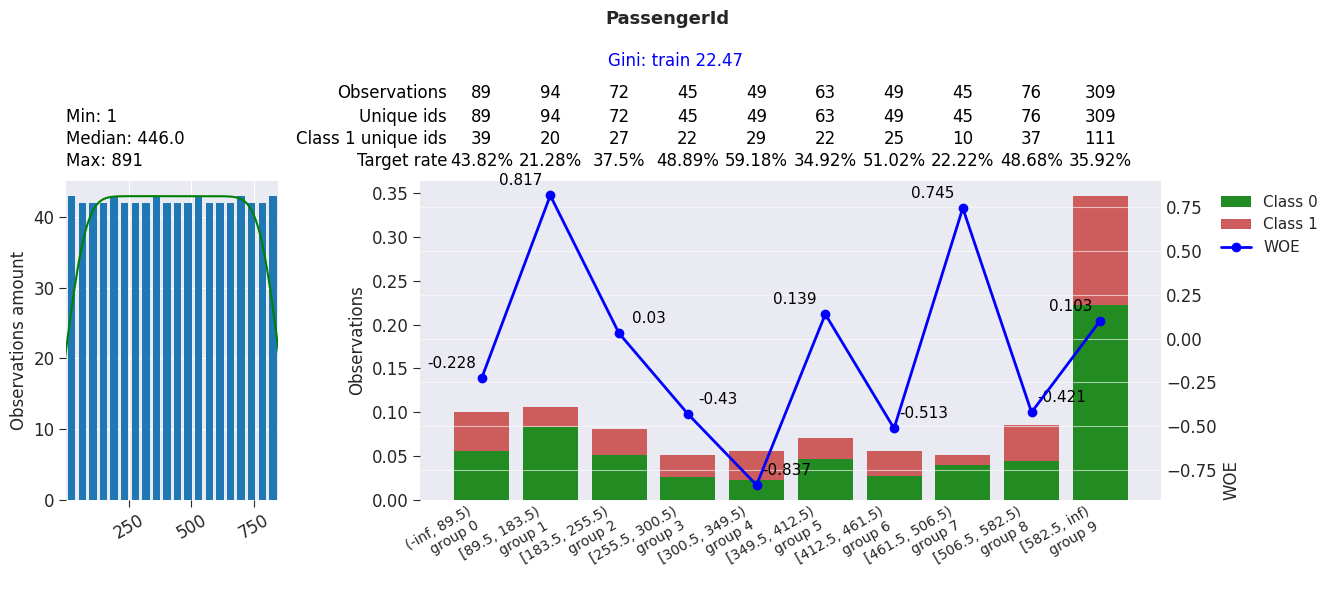

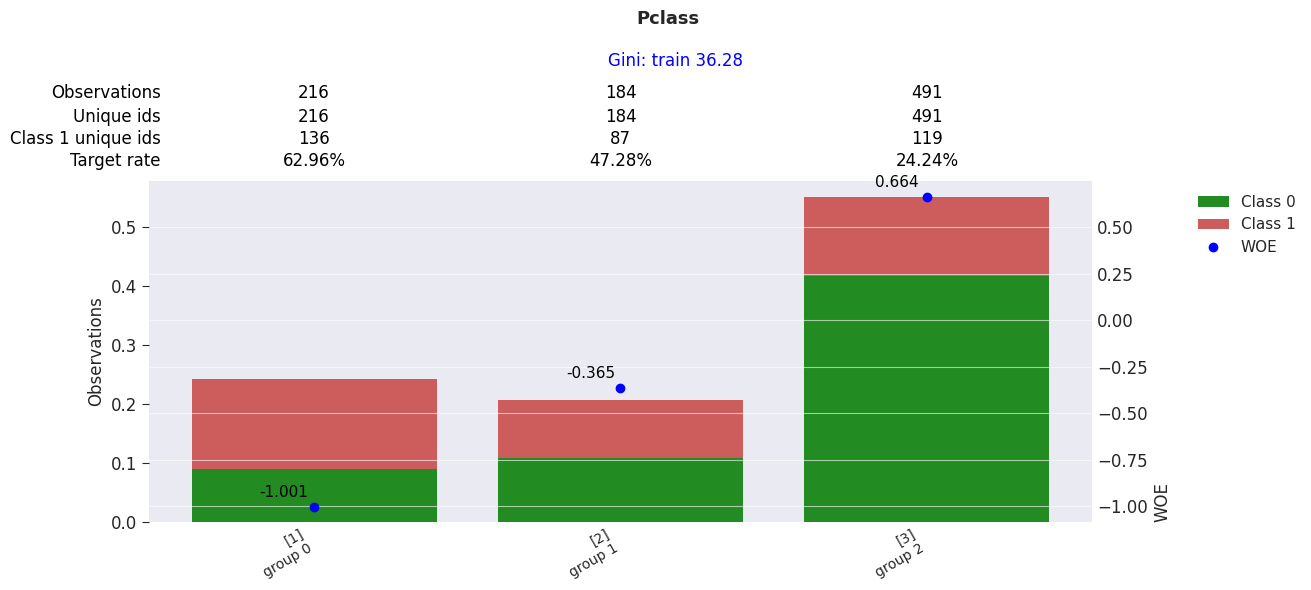

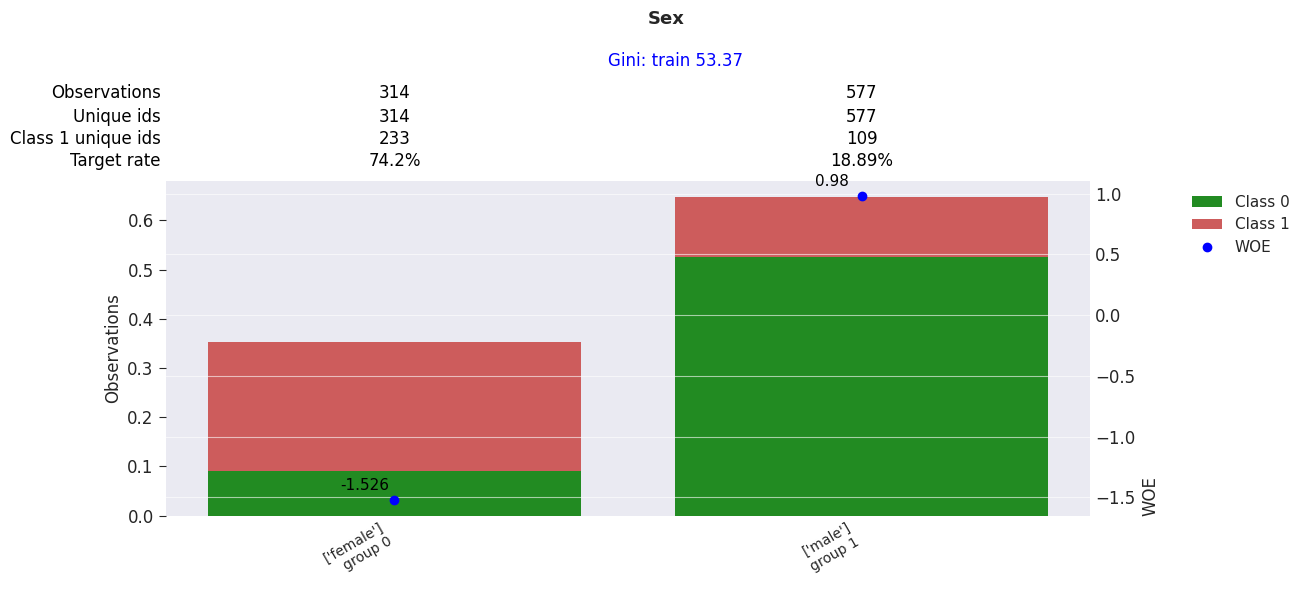

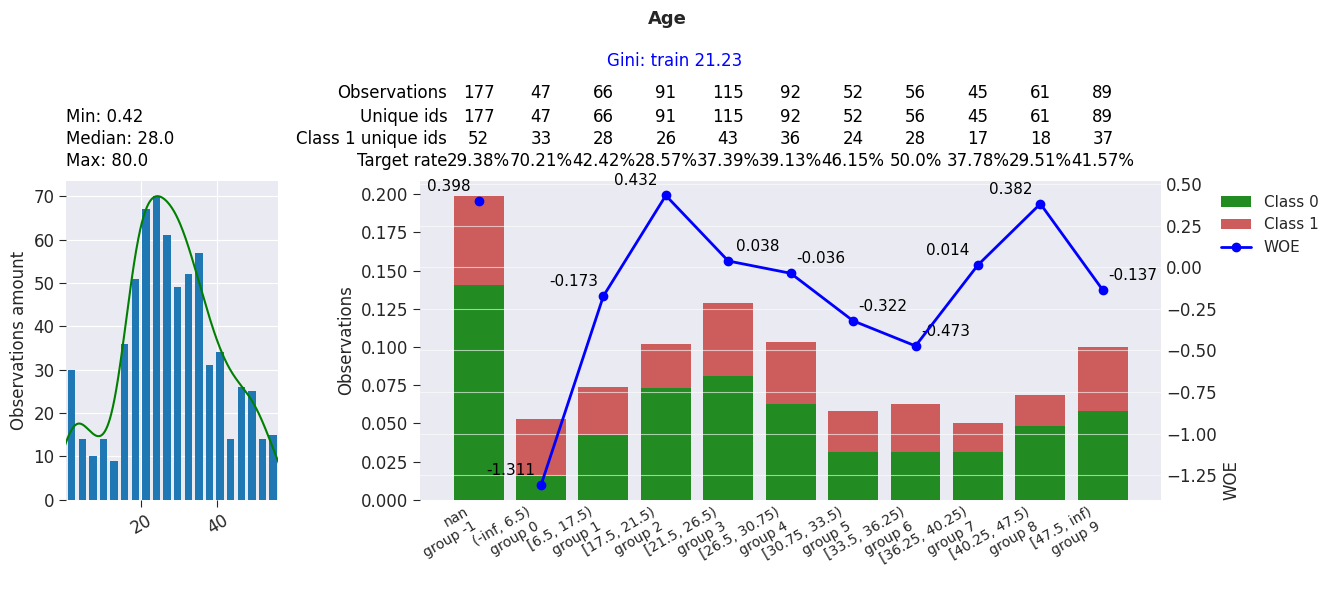

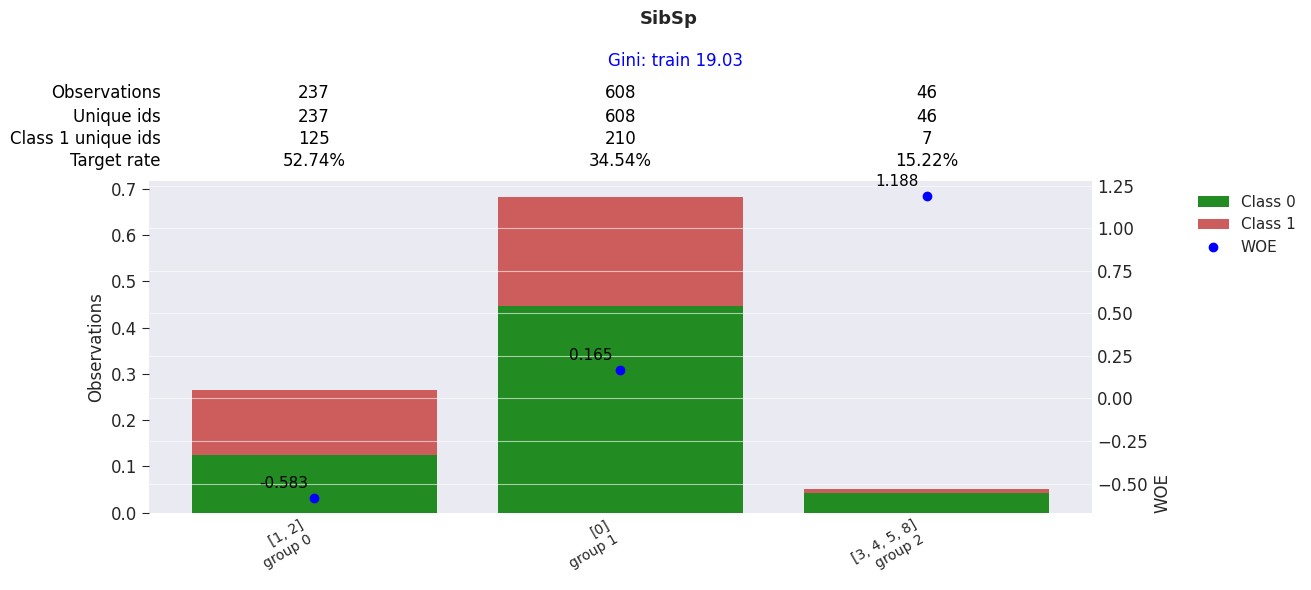

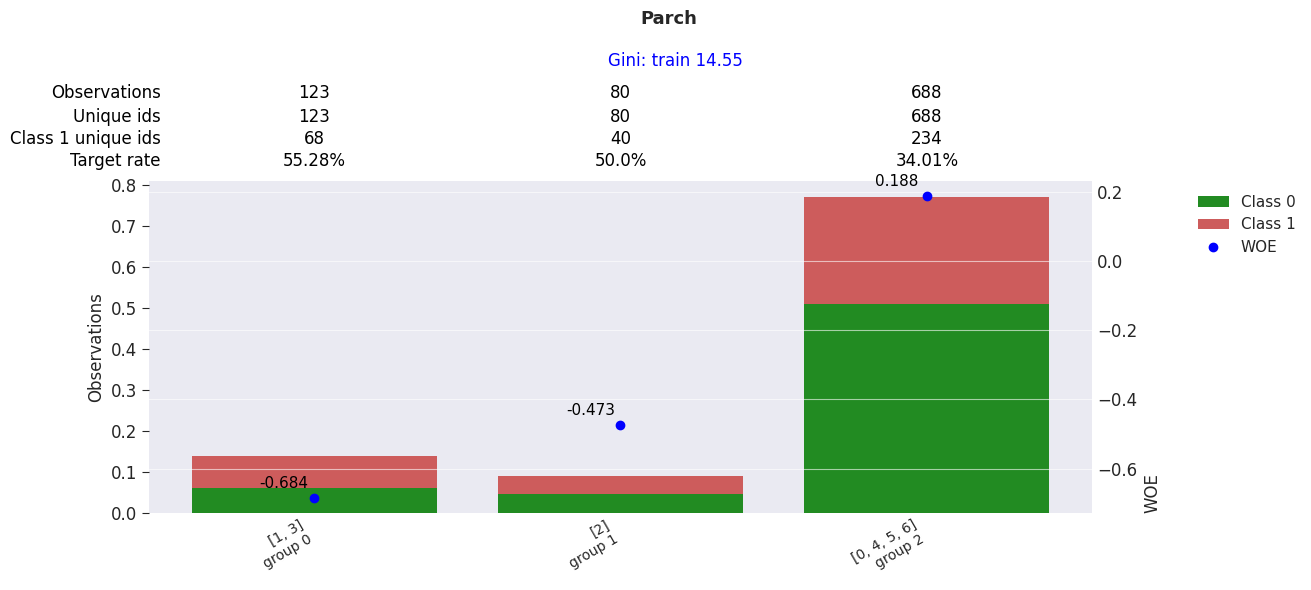

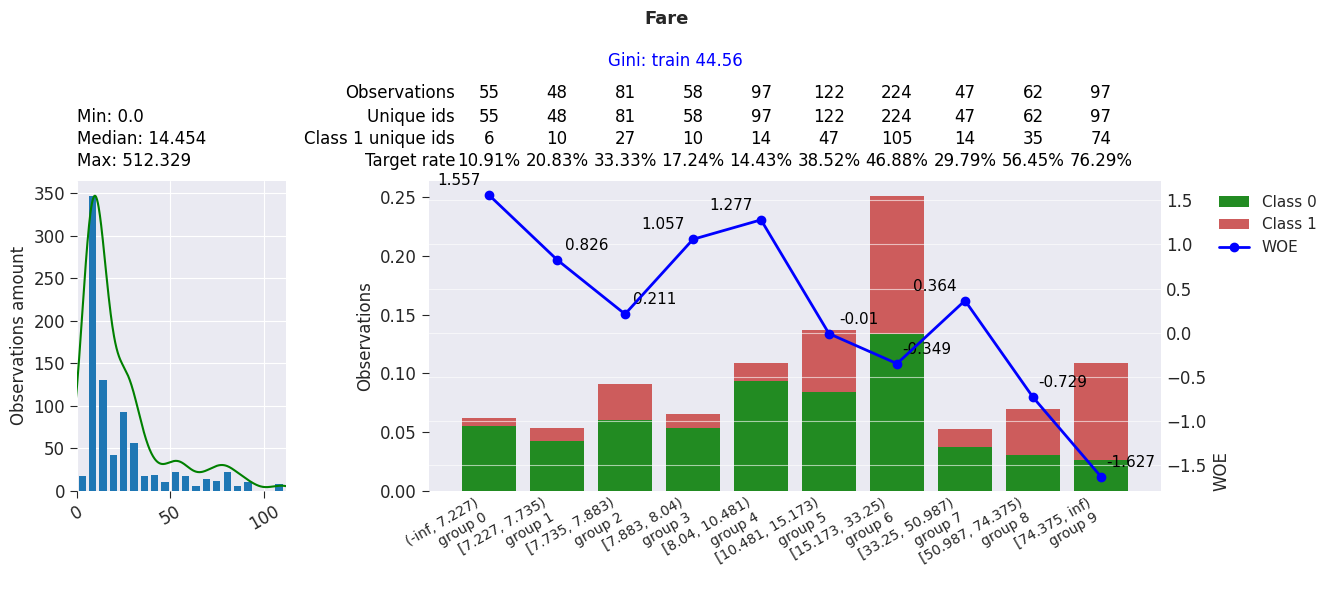

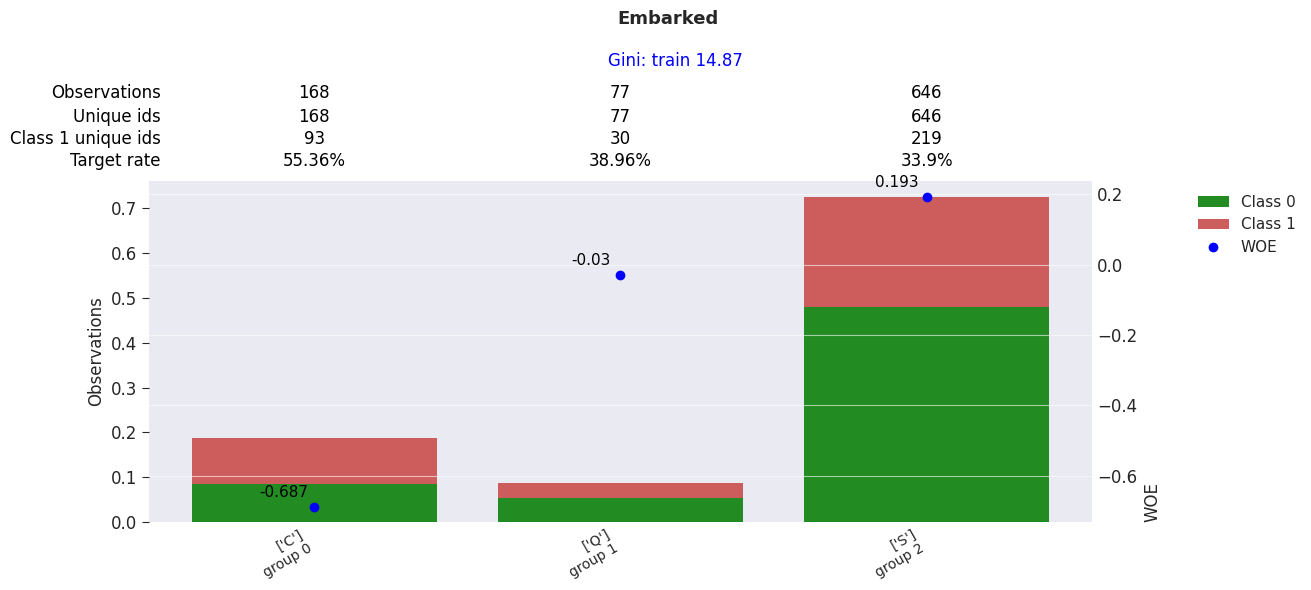

In [8]:
"""
Пересчет биннинга для списка переменных
:param features: список переменных для обработки. При None обрабатываются list(self.feature_woes) + list(self.cross_features)
:param new_groups: False - пересчитаются только WOE в биних,
                   True - также пересчитываются и границы бинов
:param plot_flag: флаг для вывода графиков с биннингом

--- Метод биннинга ---
:param method: 'tree' - биннинг деревом, 'opt' - биннинг деревом с последующей оптимизацией границ бинов библиотекой optbinning
:param max_n_bins: максимальное кол-во бинов
:param min_bin_size: минимальное число (доля) наблюдений в каждом листе дерева.
                        Если min_bin_size < 1, то трактуется как доля наблюдений от обучающей выборки

--- Параметры биннинга для метода 'tree' ---
:param criterion: критерий расщепления. Варианты значений: 'entropy', 'gini'
:param scoring: метрика для оптимизации
:param max_depth: максимальная глубина дерева

--- Параметры биннинга для метода 'opt' ---
:param monotonic: флаг для оптимизации биннинга к монотонному тренду
:param solver: солвер для оптимизации биннинга:
                'cp' - constrained programming
                'mip' - mixed-integer programming
                'ls' - LocalSorver (www.localsorver.com)
:param divergence: метрика для максимизации:
                'iv' - Information Value,
                'js' - Jensen-Shannon,
                'hellinger' - Hellinger divergence,
                'triangular' - triangular discrimination
"""  
binning.fit(features=None, new_groups=True, plot_flag=True, method='tree', max_n_bins=10, min_bin_size=0.05,
            criterion='entropy', scoring='neg_log_loss', max_depth=None, monotonic=False, solver='cp', divergence='iv')       

In [9]:
"""
Поиск оптимального биннинга, удовлетворяющего набору проверок. Итерационно для каждой переменной выполняются следующие шаги:
    1) Исходное разбиение на n бинов, где n на первой итерации равно max_n_bins
    2) Выполняются слияния соседних бинов с близким WOE (при выставленном флаге WOEM_on=True) и малых бинов (SM_on=True)
    3) Проводятся проверки на бизнес-логику (BL_on=True), джини (G_on=True) и порядок (WOEO_on=True)
    4) Если любая из проверок проваливается, то уменьшаем n на 1 и возвращаемся на шаг 1
Если после перебора всех n проверки так и не успешны, то переменная исключается из списка.
В случае, если задан params_space, то вся процедура повторяется для каждого набора параметров и
затем выбирается биннинг с наибольшим джини.

:param features: список переменных для обработки. При None обрабатываются все self.feature_woes
:param autofit_folder: название папки, в которую будут сохранены результаты автобиннинга
:param plot_flag: флаг для вывода графиков с биннингом:
                    -1 - графики не строить
                    0, False - графики сохранить в папку autofit_folder/Figs_binning, но не выводить в аутпут
                    1, True - графики сохранить в папку autofit_folder/Figs_binning и вывести в аутпут
:param verbose: флаг для вывода подробных комментариев в процессе работы

--- Метод биннинга ---
:param method: 'tree' - биннинг деревом, 'opt' - биннинг деревом с последующей оптимизацией границ бинов библиотекой optbinning
:param max_n_bins: максимальное кол-во бинов
:param min_bin_size: минимальное число (доля) наблюдений в каждом листе дерева.
                        Если min_bin_size < 1, то трактуется как доля наблюдений от обучающей выборки

--- Параметры биннинга для метода 'tree' ---
:param criterion: критерий расщепления. Варианты значений: 'entropy', 'gini', 'log_loss'
:param scoring: метрика для оптимизации
:param max_depth: максимальная глубина дерева

--- Параметры биннинга для метода 'opt' ---
:param solver: солвер для оптимизации биннинга:
                'cp' - constrained programming
                'mip' - mixed-integer programming
                'ls' - LocalSorver (www.localsorver.com)
:param divergence: метрика для максимизации:
                'iv' - Information Value,
                'js' - Jensen-Shannon,
                'hellinger' - Hellinger divergence,
                'triangular' - triangular discrimination

--- Параметры проверок ---
:param WOEM_on: флаг проверки на разницу WOE между соседними бинами
:param WOEM_woe_threshold: минимальная разрешенная дельта WOE между соседними бинами
:param WOEM_with_missing: должна ли выполняться проверка для бина с пустыми значениями
:param SM_on: флаг проверки на размер бина
:param SM_target_threshold: минимальное кол-во (доля) наблюдений с целевым событием в бине
:param SM_size_threshold: минимальное кол-во (доля) наблюдений в бине
:param BL_on: флаг проверки на бизнес-логику
:param BL_allow_Vlogic_to_increase_gini: разрешить V-образную бизнес-логику, если она приводит к увеличению джини переменной на эту величину относительного монотонного тренда.
                                         При значении 100 V-образная бизнес-логика запрещена
:param G_on: флаг проверки на джини
:param G_gini_threshold: минимальное допустимое джини переменной.
        Проверяется на трэйне + если заданы бутстрэп сэмплы, то проверяется на них условие mean-1.96*std > G_gini_threshold
:param G_with_test: так же проверяется джини на всех остальных доступных сэмплах.
:param G_gini_decrease_threshold: допустимое уменьшение джини на всех сэмплах относительно трэйна.
        В случае, если значение >= 1, то проверяется условие gini(train) - gini(sample) <= G_gini_decrease_threshold для основных сэмплов
                                                           и 1.96*std <= G_gini_decrease_threshold для бутсрэп сэмплов
                  если значение < 1, то проверяется условие 1 - gini(sample)/gini(train) <= G_gini_decrease_threshold для основных сэмплов
                                                          и 1.96*std/mean <= G_gini_decrease_threshold для бутсрэп сэмплов
:param G_gini_increase_restrict: такое же ограничение действует и на увеличение джини
:param WOEO_on: флаг проверки на сохранение тренда WOE на бутстрэп-сэмплах
:param WOEO_dr_threshold: допустимая дельта между TargetRate соседних бинов для прохождения проверки, в случае нарушения тренда
:param WOEO_correct_threshold: доля бутстрэп-сэмплов, на которых должна проходить проверка
:param WOEO_miss_is_incorrect: считать ли отсутствие данных в бине сэмпла ошибкой или нет
:param WOEO_with_test: так же проверять тренд на остальных доступных сэмплах.

--- Пространство параметров ---
:param params_space: пространство параметров, с которыми будут выполнены автобиннинги.
        Задается в виде словаря {параметр: список значений}
:param woe_best_samples: список сэмплов, джини которых будет учитываться при выборе лучшего биннинга.  При None берется джини на трэйне

--- Кросс переменные ---
:param cross_features_first_level: список переменных первого уровня для которых будут искаться лучшие кросс пары. При None берется features
:param cross_num_second_level: кол-во кросс пар, рассматриваемых для каждой переменной первого уровня
                                   0 - поиск не производится
                                   -1 - рассматриваются все возможные кросс пары
                                   n - для каждой переменной первого уровня отбираются n лучших переменных с максимальной метрикой criterion
"""
binning.auto_fit(features=None, autofit_folder='auto_fit', plot_flag=-1, verbose=False,
                 params_space=None, woe_best_samples=None, method='opt', max_n_bins=10, min_bin_size=0.05,
                 criterion='entropy', scoring='neg_log_loss', max_depth=5, solver='cp', divergence='iv',
                 WOEM_on=True, WOEM_woe_threshold=0.05, WOEM_with_missing=False,
                 SM_on=True, SM_target_threshold=5, SM_size_threshold=100,
                 BL_on=True, BL_allow_Vlogic_to_increase_gini=100,
                 G_on=True, G_gini_threshold=5, G_with_test=False, G_gini_decrease_threshold=0.2, G_gini_increase_restrict=True,
                 WOEO_on=False, WOEO_dr_threshold=0.01, WOEO_correct_threshold=0.85, WOEO_miss_is_incorrect=True, WOEO_with_test=False,
                 cross_features_first_level=None, cross_num_second_level=1)


------------------------------------------------------------------------ SFA -------------------------------------------------------------------------

Performing autobinning with parameters space of size 1...
Using parameters set 1/1: {'method': 'opt', 'max_n_bins': 10, 'min_bin_size': 0.05, 'criterion': 'entropy', 'scoring': 'neg_log_loss', 'max_depth': 5, 'solver': 'cp', 'divergence': 'iv', 'WOEM_on': True, 'WOEM_woe_threshold': 0.05, 'WOEM_with_missing': False, 'SM_on': True, 'SM_target_threshold': 5, 'SM_size_threshold': 100, 'G_on': True, 'G_gini_threshold': 5, 'G_gini_decrease_threshold': 0.2, 'G_gini_increase_restrict': True, 'G_with_test': False, 'WOEO_on': False, 'WOEO_dr_threshold': 0.01, 'WOEO_correct_threshold': 0.85, 'WOEO_miss_is_incorrect': True, 'WOEO_with_test': False, 'BL_on': True, 'BL_allow_Vlogic_to_increase_gini': 100}
Processing 8 features on 1 CPU...


100%|██████████| 8/8 [00:02<00:00,  2.96it/s]


Performing autobinning for cross features with parameters space of size 1...
Finding the best pairs to first-level features...


100%|██████████| 8/8 [00:01<00:00,  6.18it/s]


Creating feature_crosses...


100%|██████████| 8/8 [00:00<00:00, 157.14it/s]


Using parameters set 1/1: {'method': 'opt', 'max_n_bins': 10, 'min_bin_size': 0.05, 'criterion': 'entropy', 'scoring': 'neg_log_loss', 'max_depth': 5, 'solver': 'cp', 'divergence': 'iv', 'WOEM_on': True, 'WOEM_woe_threshold': 0.05, 'WOEM_with_missing': False, 'SM_on': True, 'SM_target_threshold': 5, 'SM_size_threshold': 100, 'G_on': True, 'G_gini_threshold': 5, 'G_gini_decrease_threshold': 0.2, 'G_gini_increase_restrict': True, 'G_with_test': False, 'WOEO_on': False, 'WOEO_dr_threshold': 0.01, 'WOEO_correct_threshold': 0.85, 'WOEO_miss_is_incorrect': True, 'WOEO_with_test': False, 'BL_on': True, 'BL_allow_Vlogic_to_increase_gini': 100}
Processing 8 first level features on 1 CPU...


100%|██████████| 8/8 [00:16<00:00,  2.02s/it]


Scorecard saved to the file titanic_output/auto_fit_scorecard.xlsx
All done! 8/8 features successfully binned. Found 8 cross features.


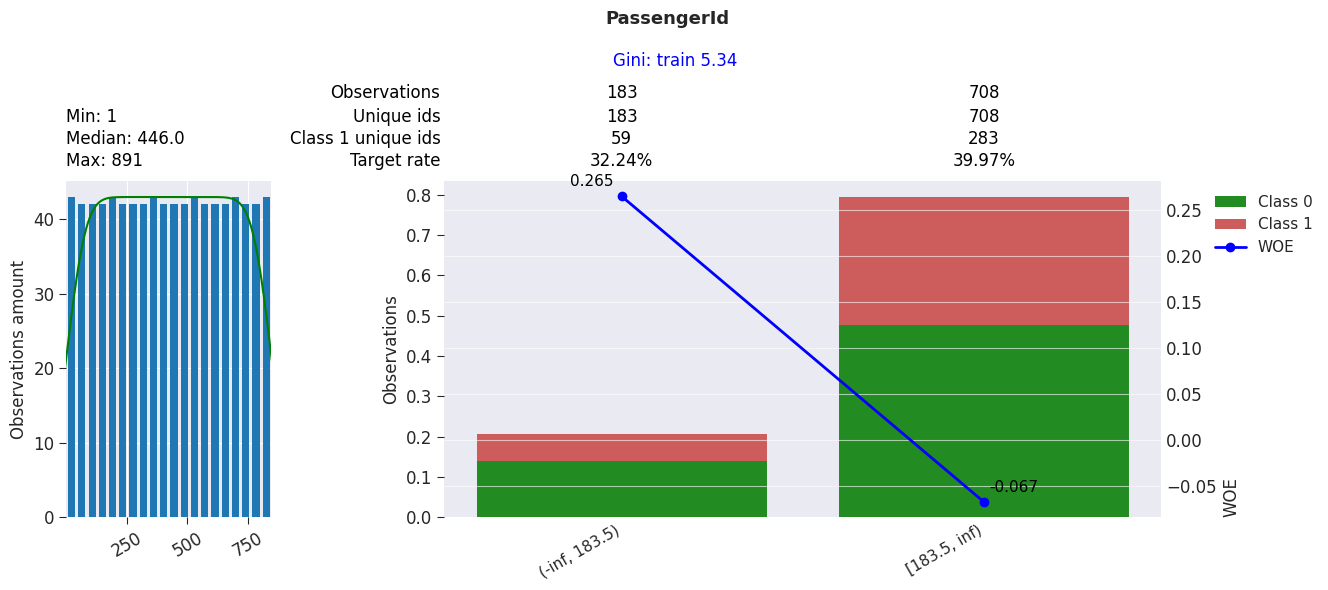

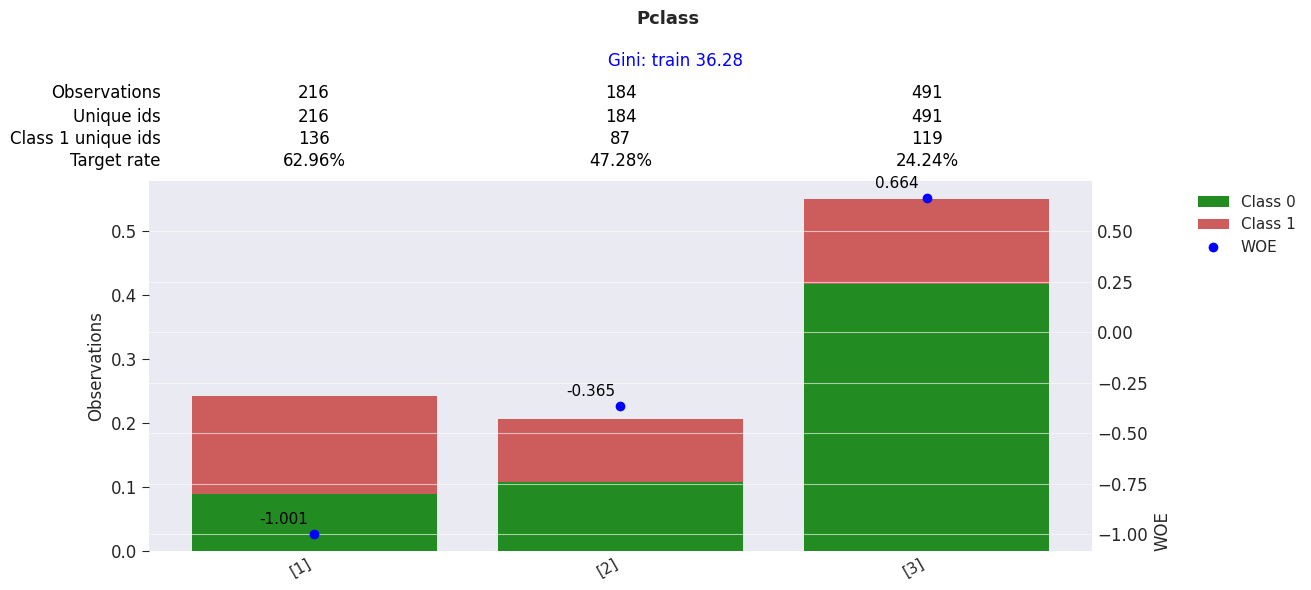

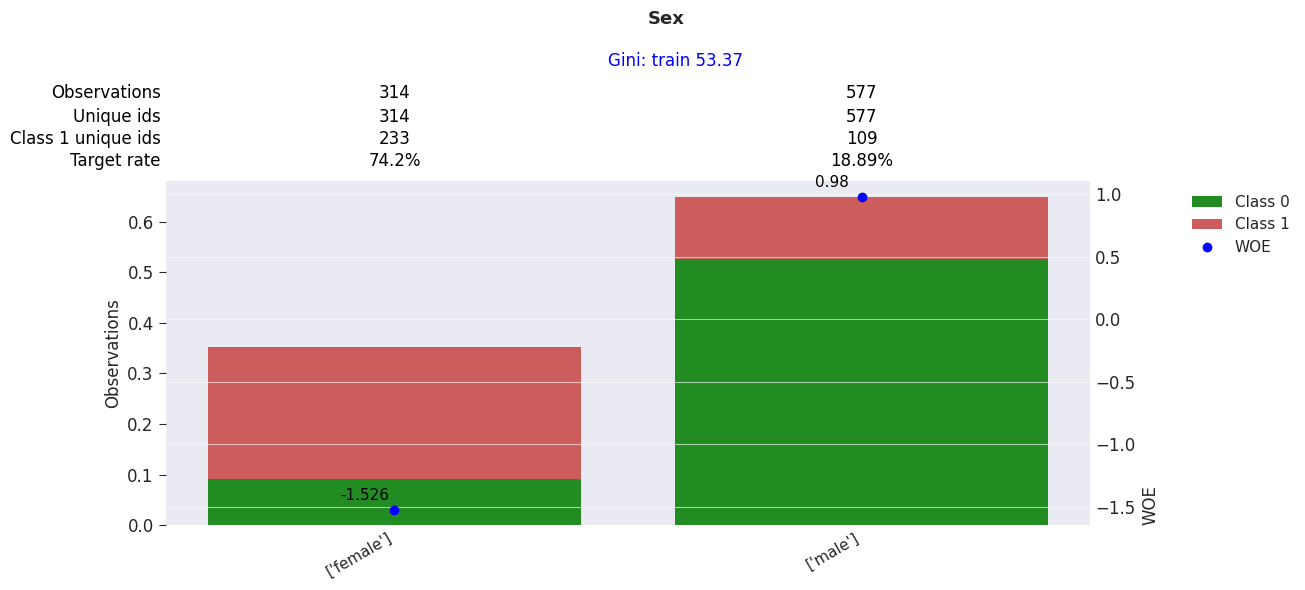

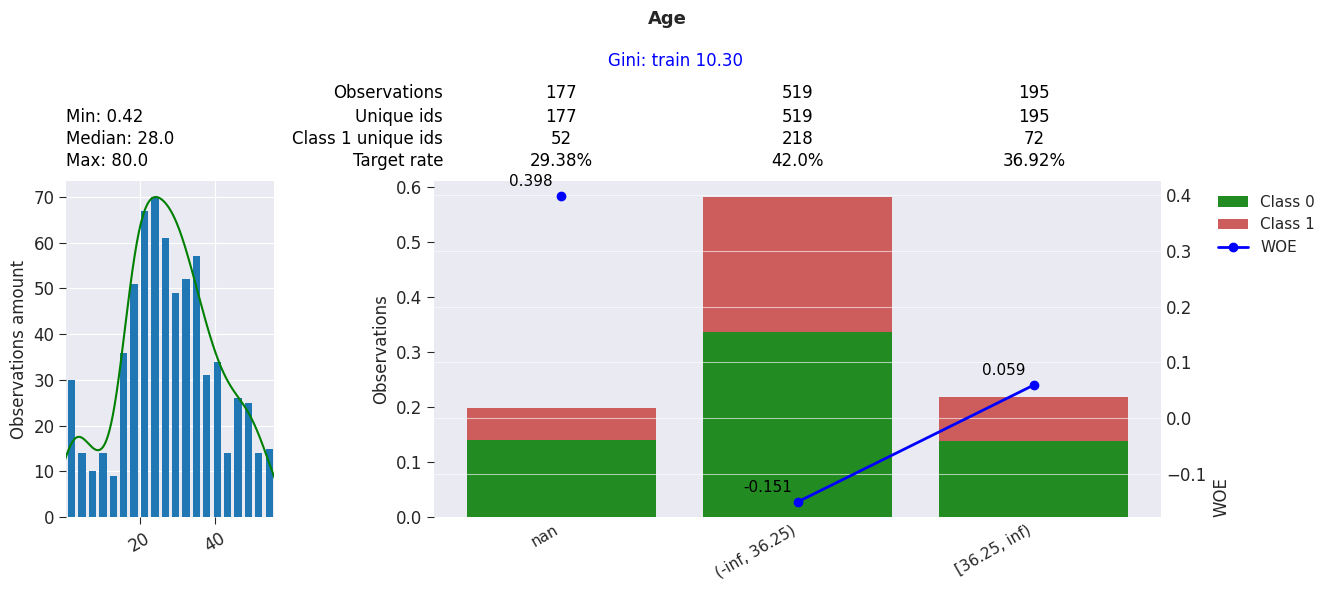

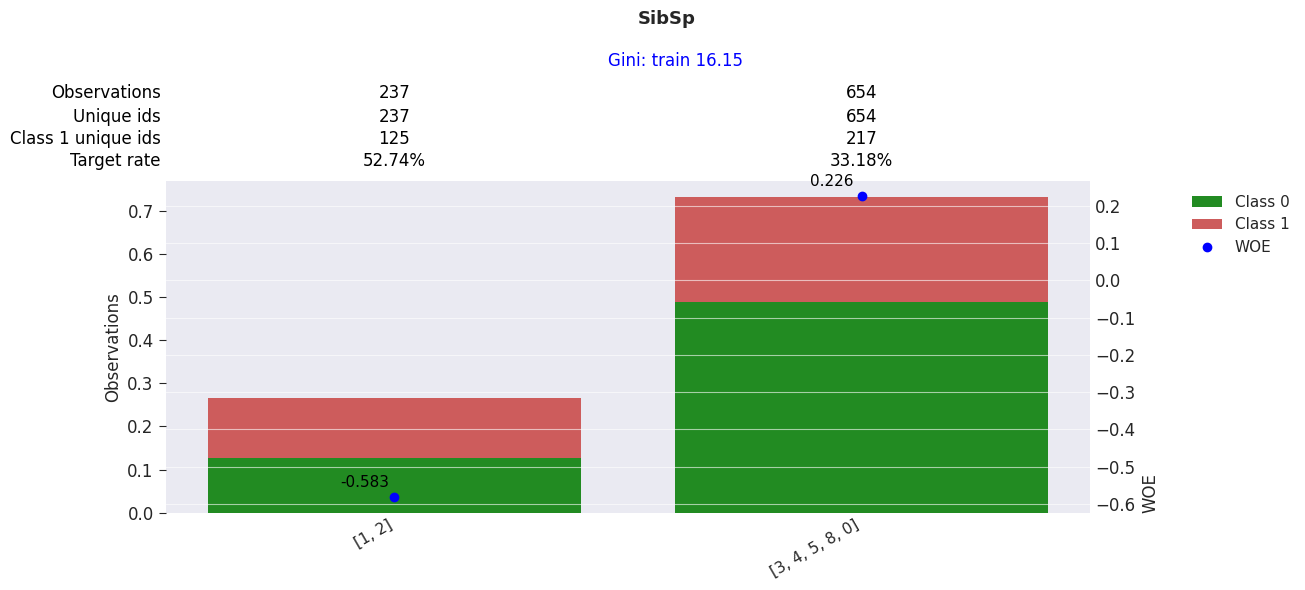

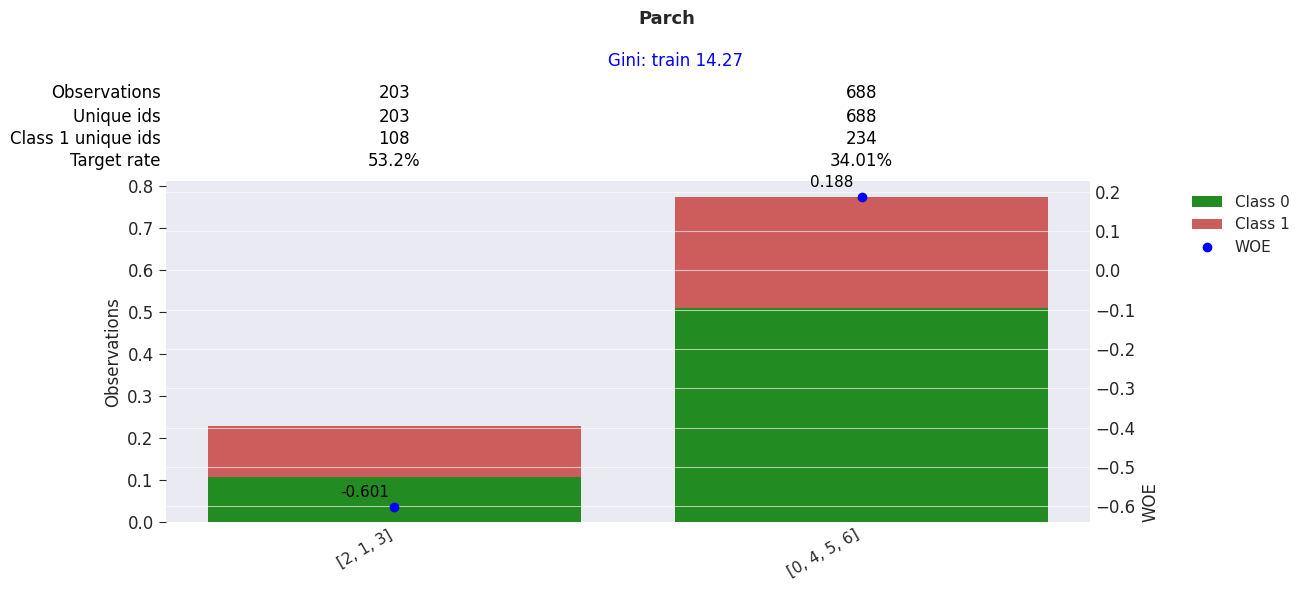

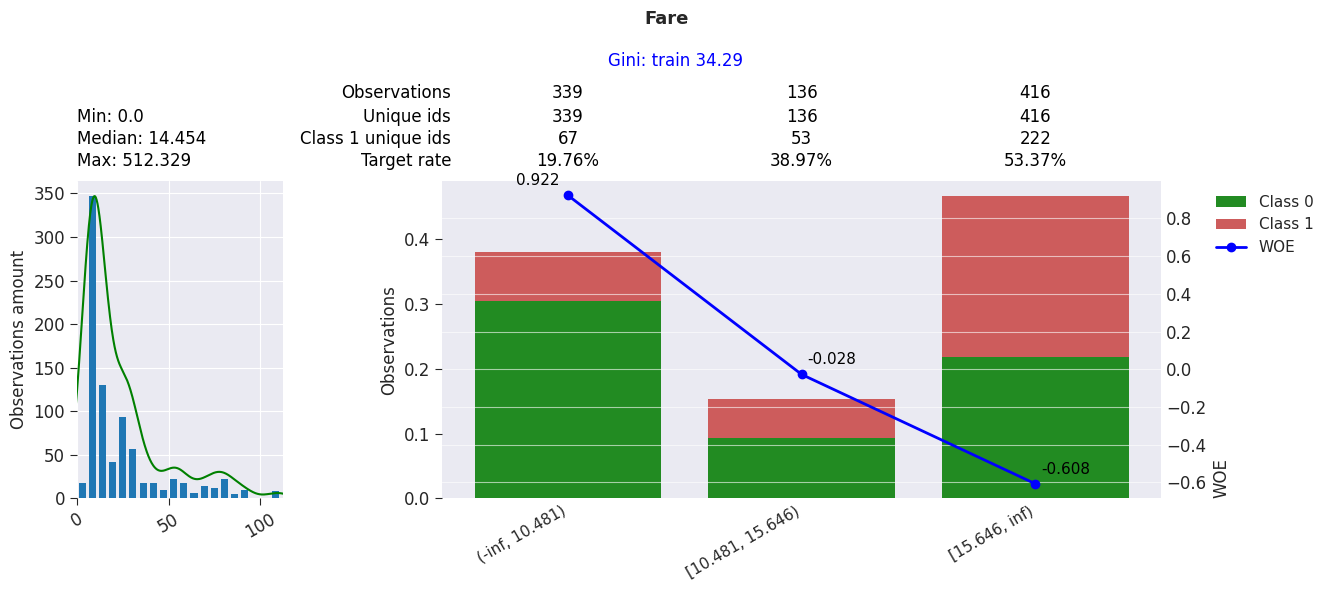

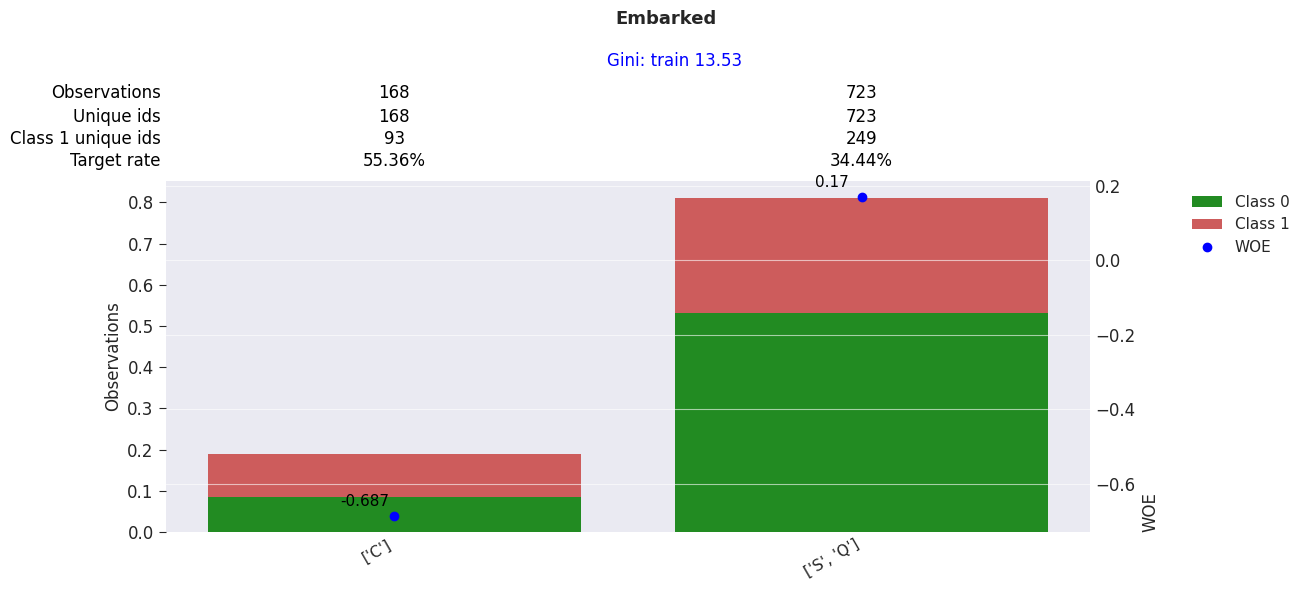

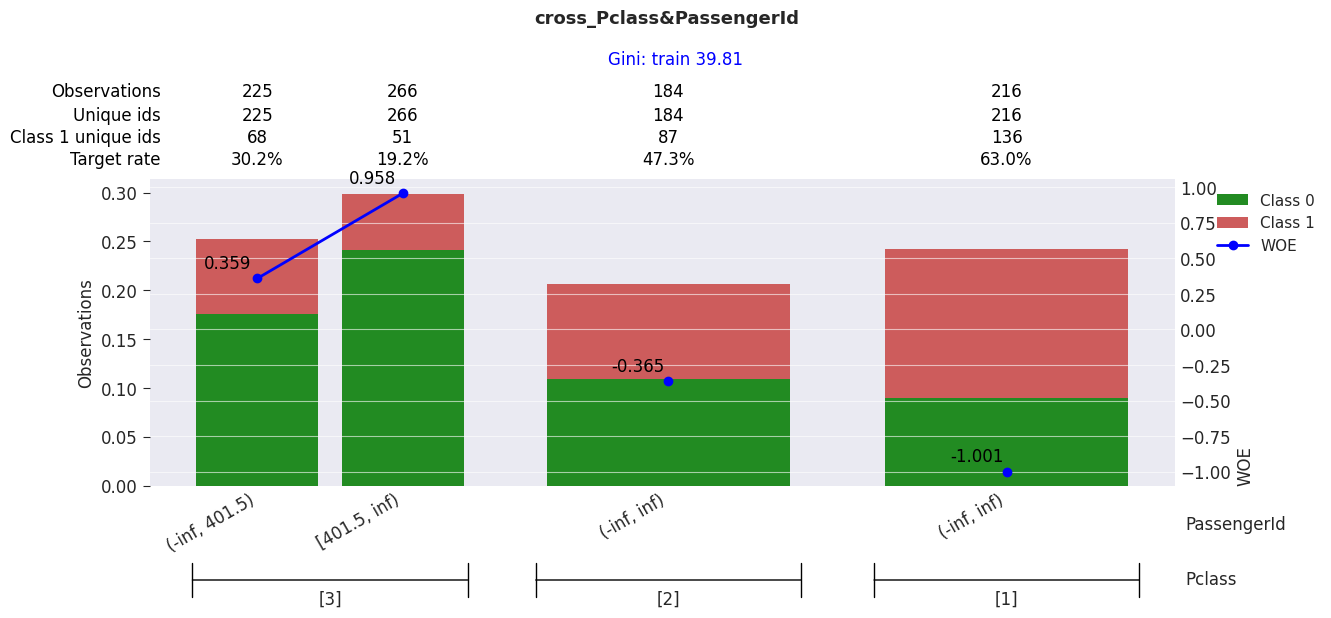

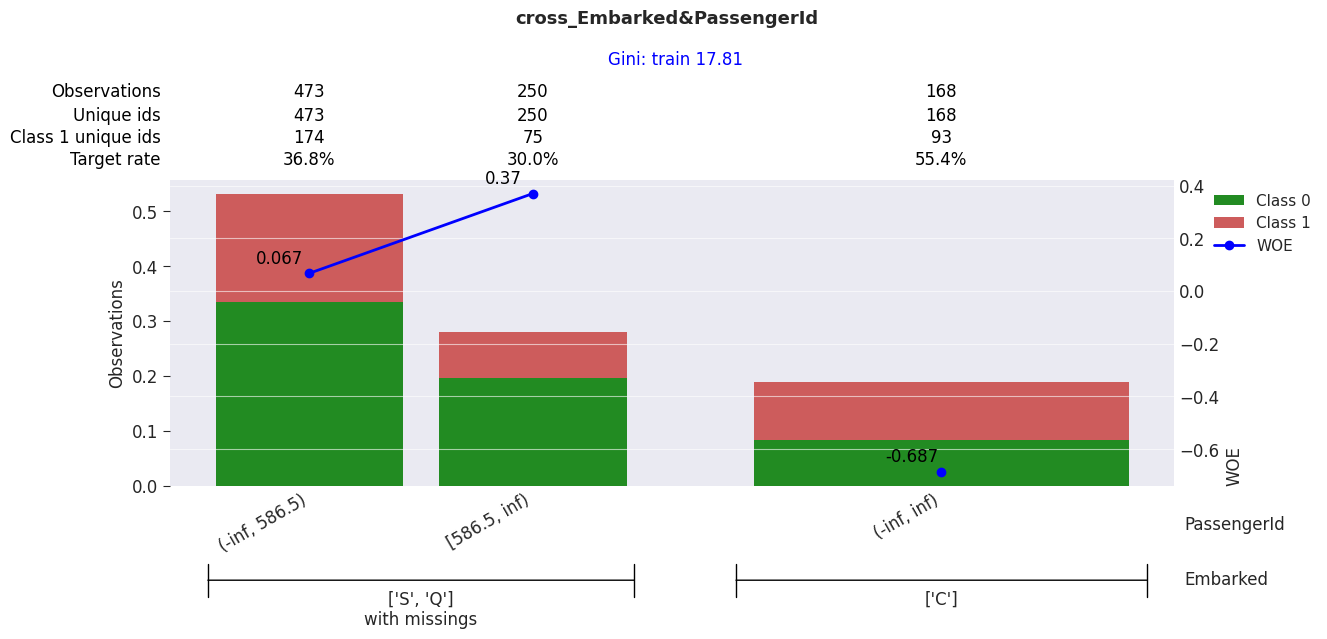

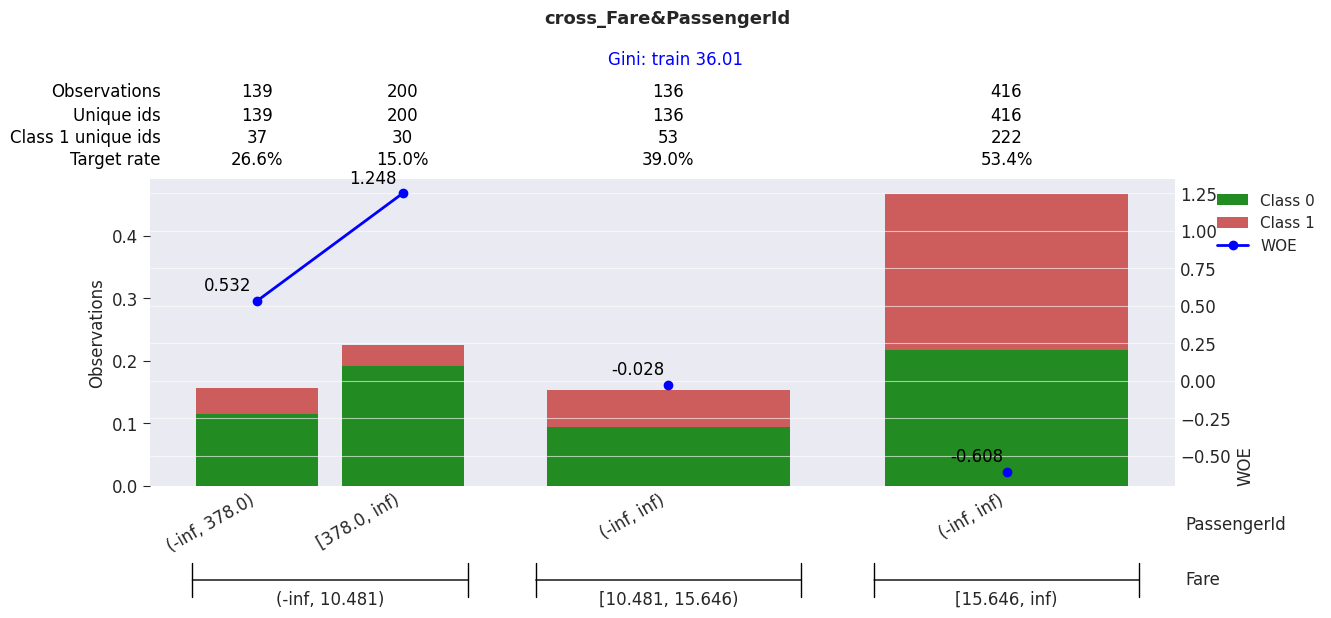

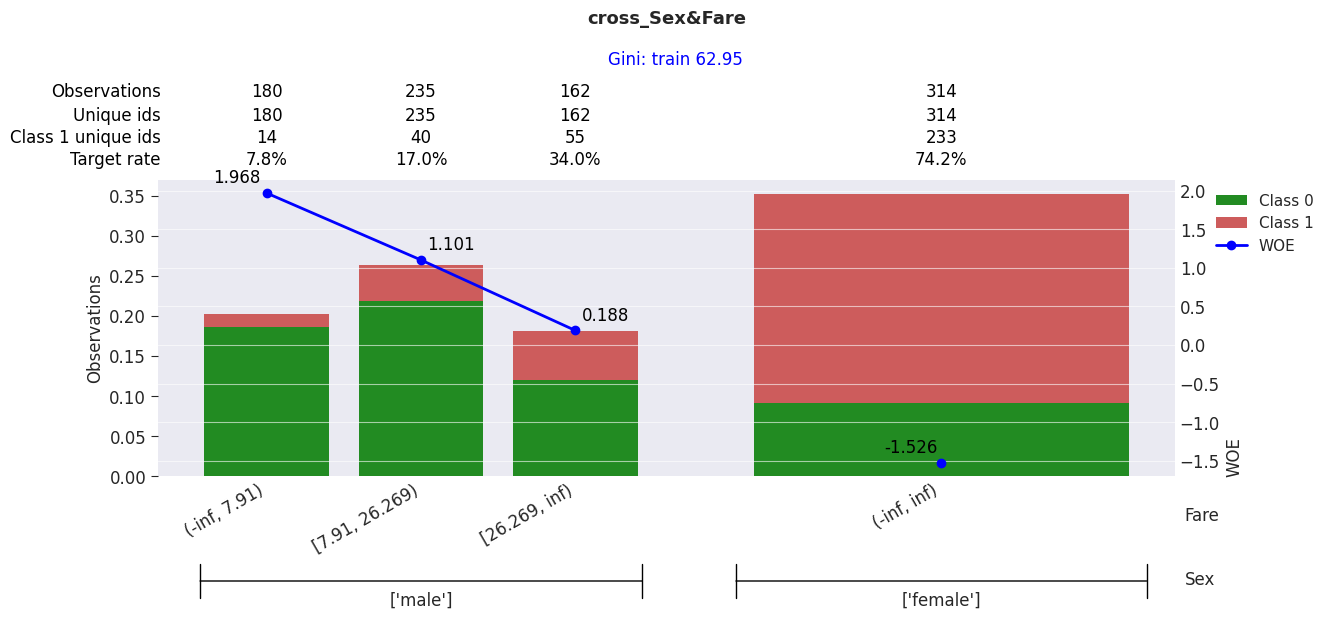

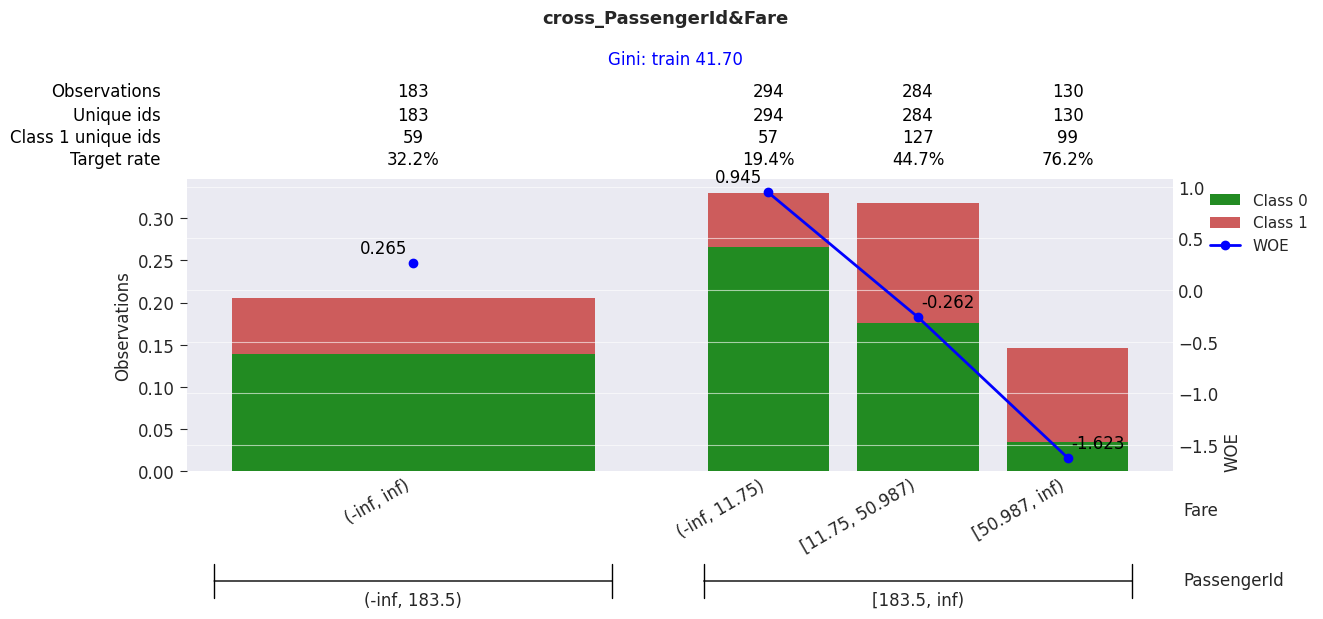

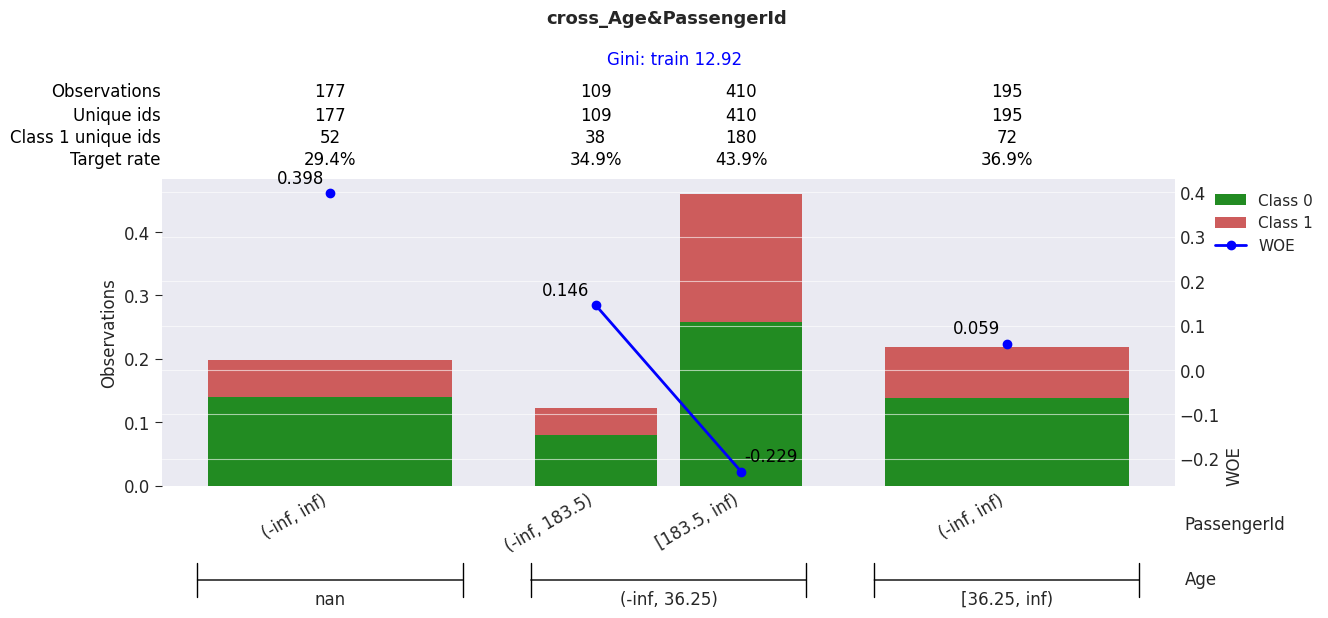

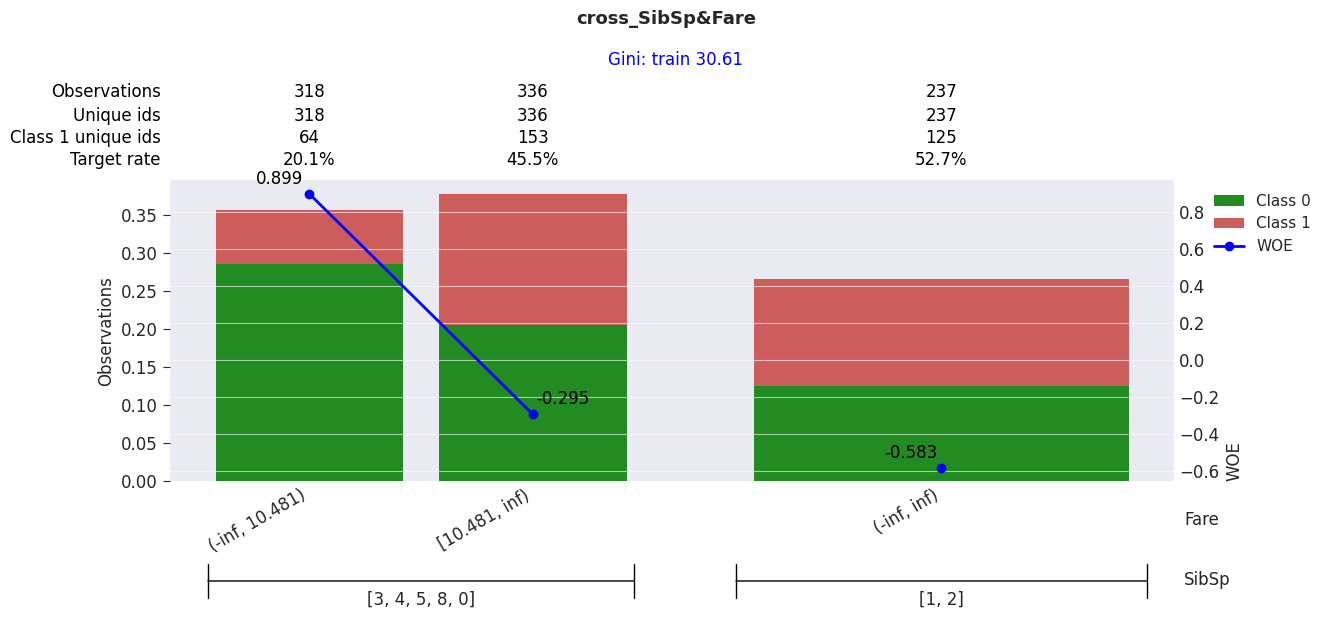

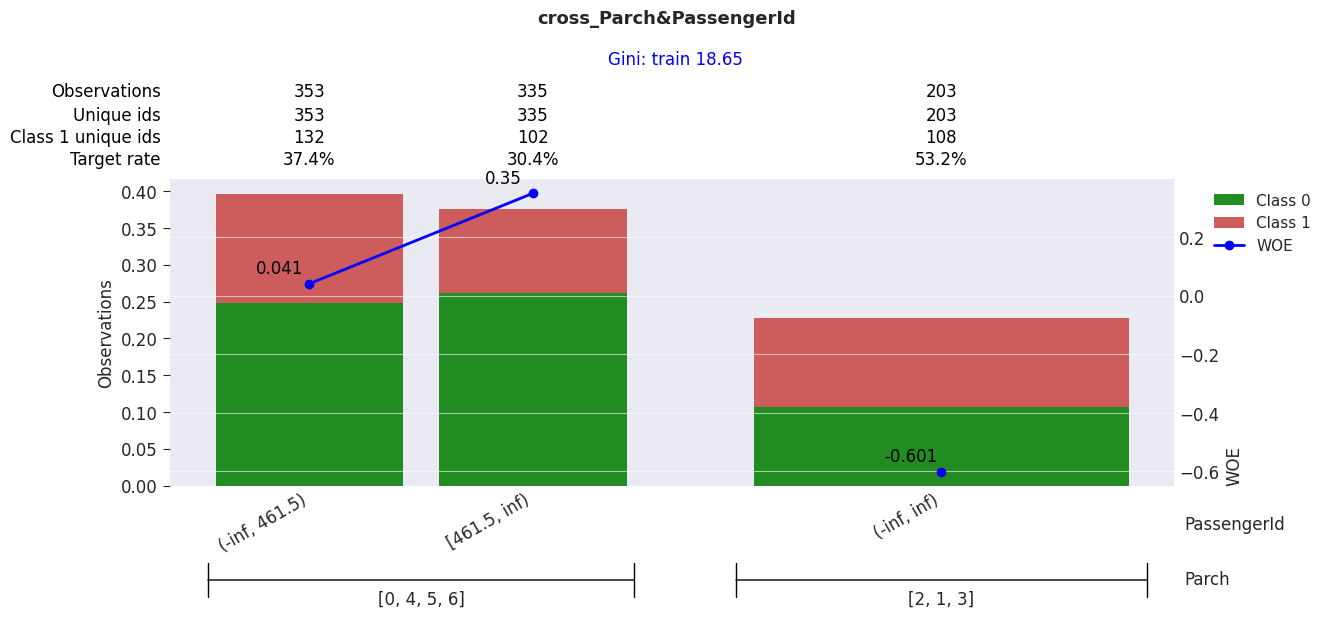

[<Figure size 1350x600 with 4 Axes>,
 <Figure size 1350x600 with 2 Axes>,
 <Figure size 1350x600 with 2 Axes>,
 <Figure size 1350x600 with 4 Axes>,
 <Figure size 1350x600 with 2 Axes>,
 <Figure size 1350x600 with 2 Axes>,
 <Figure size 1350x600 with 4 Axes>,
 <Figure size 1350x600 with 2 Axes>,
 <Figure size 1350x650 with 3 Axes>,
 <Figure size 1350x650 with 3 Axes>,
 <Figure size 1350x650 with 3 Axes>,
 <Figure size 1350x650 with 3 Axes>,
 <Figure size 1350x650 with 3 Axes>,
 <Figure size 1350x650 with 3 Axes>,
 <Figure size 1350x650 with 3 Axes>,
 <Figure size 1350x650 with 3 Axes>]

In [10]:
"""
Отрисовка биннинга
:param features: список переменных для обработки. При None отрисоываются все активные переменные
:param folder: папка, в которую должны быть сохранены рисунки. При None не сохраняются
:param plot_flag: флаг для вывода рисунка
:param show_groups: флаг для отображения номер групп на рисунке
:param verbose: флаг для отображения счетчика обработанных рисунков
:param all_samples: отрисовка бинов по всем сэмплам, может принимать значения:
                    0, False - строятся бины только на трэйне
                    1, True – строятся бины по всем сэмплам, таргет рейт указывается только для трэйна
                    >1  – строятся бины и таргет рейт указывается по всем сэмплам

:return: список из графиков [plt.figure]
""" 
binning.plot_bins(features=None, folder=None, plot_flag=True, show_groups=False, verbose=False, all_samples=False)        

Age : merging [0, 1]


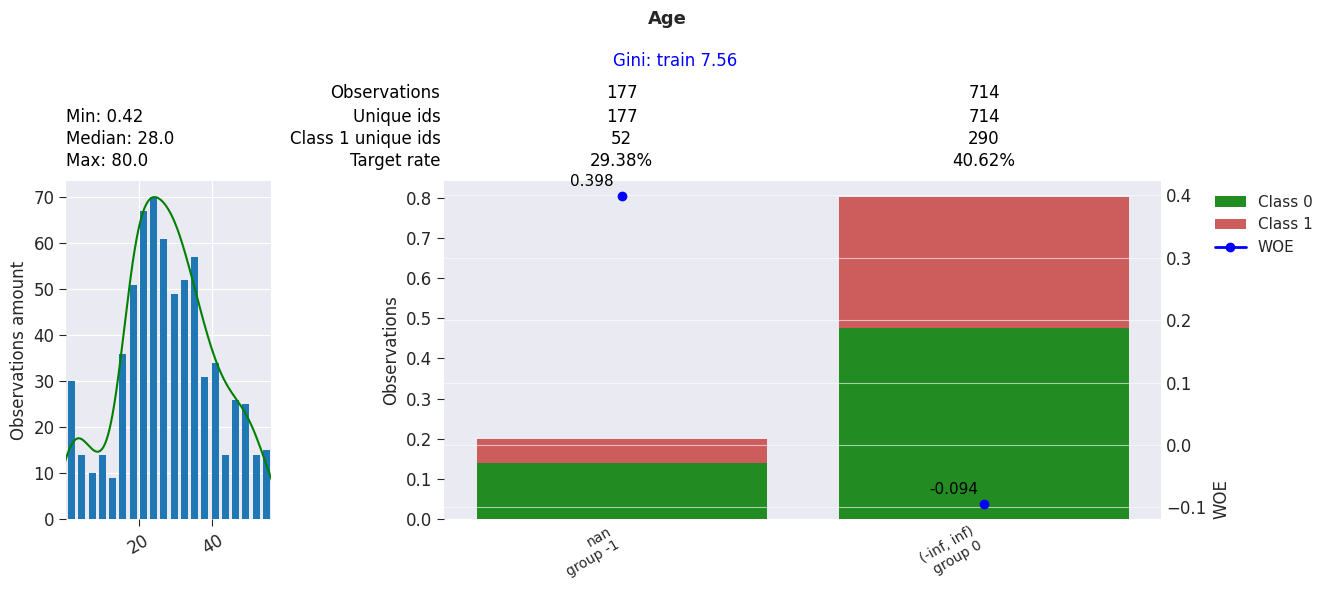

In [11]:
"""
Объединение двух бинов
:param feature: переменная
:param groups_list: [group1, group2] - список из двух бинов для объединения
:param plot_flag: флаг вывода графика после разделения
"""
binning.merge(feature='Age', groups_list=[0, 1], plot_flag=True)        

In [12]:
"""
Объединение всех близких по ВОЕ бинов
:param woe_threshold: минимальная разрешенная дельта WOE между соседними бинами
"""
binning.merge_by_woe(woe_threshold=0.05)

In [13]:
"""
Объединение малых бинов с соседними ближайшими по ВОЕ
:param target_threshold: минимальное кол-во (доля) наблюдений с целевым событием в бине
:param size_threshold: минимальное кол-во (доля) наблюдений в бине
"""
binning.merge_by_size(target_threshold=5, size_threshold=100)        

Splitting started! Feature Age group: 0
Additional bound  6.5


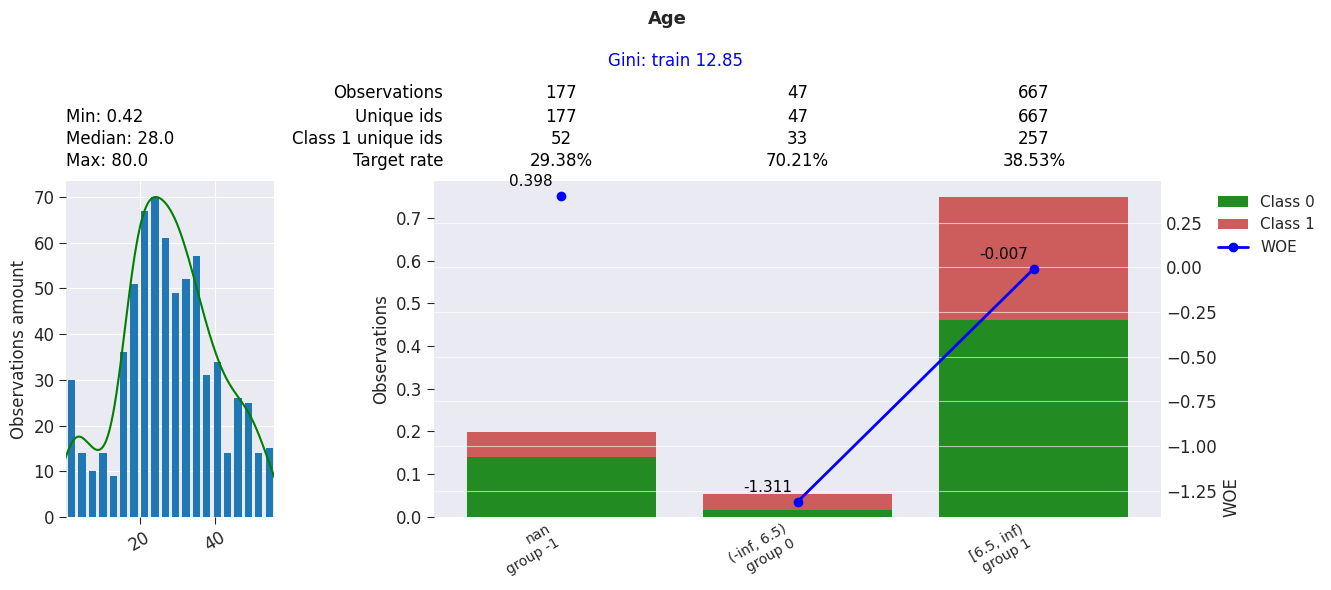

In [14]:
"""
Разделение выбранного бина на две части
:param feature: переменная
:param group: номер бина для разделения, начиная с 0
:param to_add: для числовых - граница между бинами, для категориальных - список значений для выделения в новый бин
:param min_bin_size: минимальное число (доля) наблюдений в каждом бине
:param criterion: критерий расщепления. Варианты значений: 'entropy', 'gini'
:param scoring: метрика для оптимизации
:param plot_flag: флаг вывода графика после разделения
"""
feature = 'Age'
group = 0
binning.split(feature=feature, group=group, to_add=None, min_bin_size=0.05, criterion='entropy', scoring='neg_log_loss', plot_flag=True)        

Iteration 0


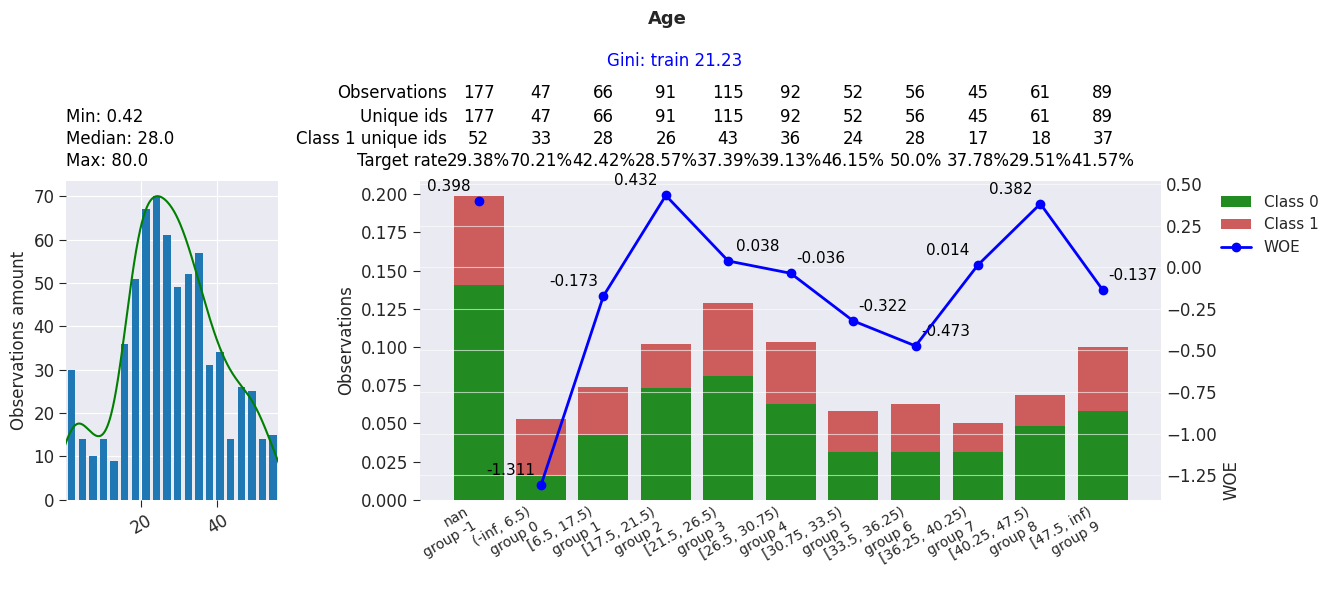

Iteration 1


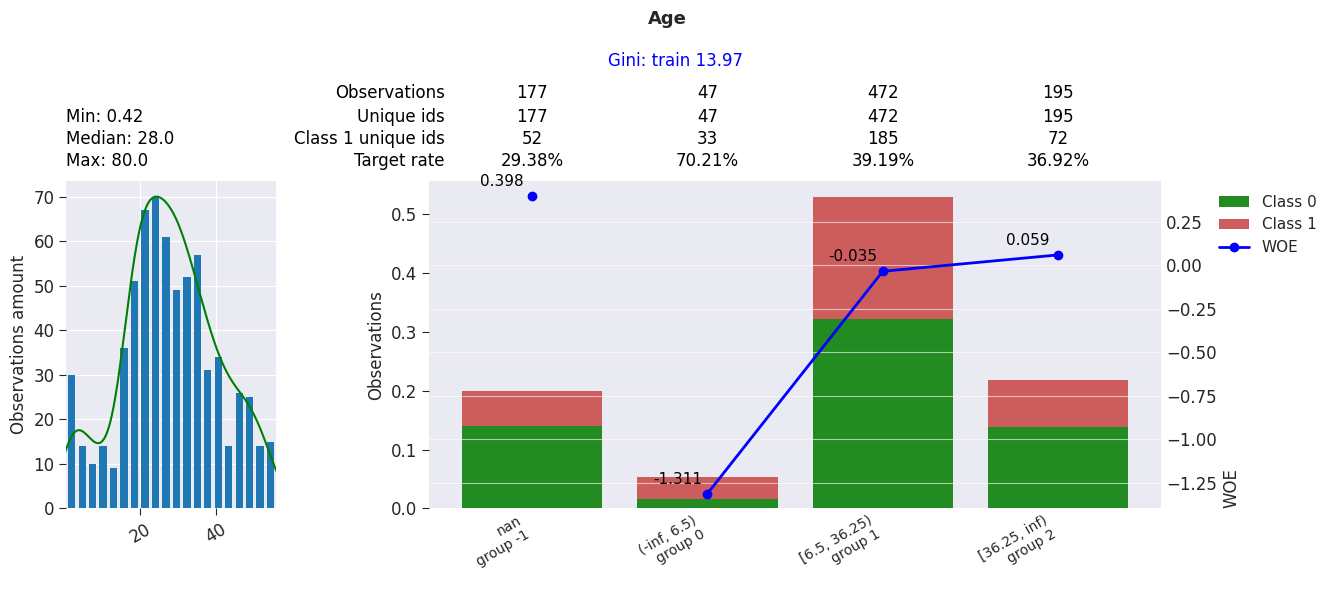

Iteration 2


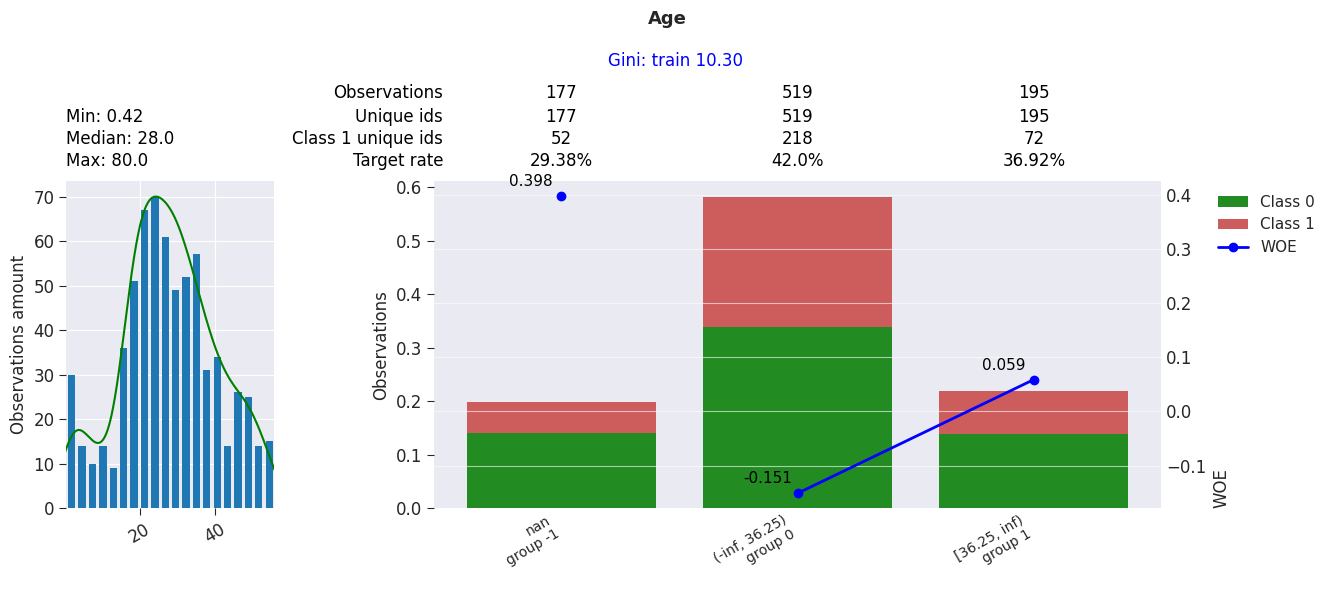

Iteration 3


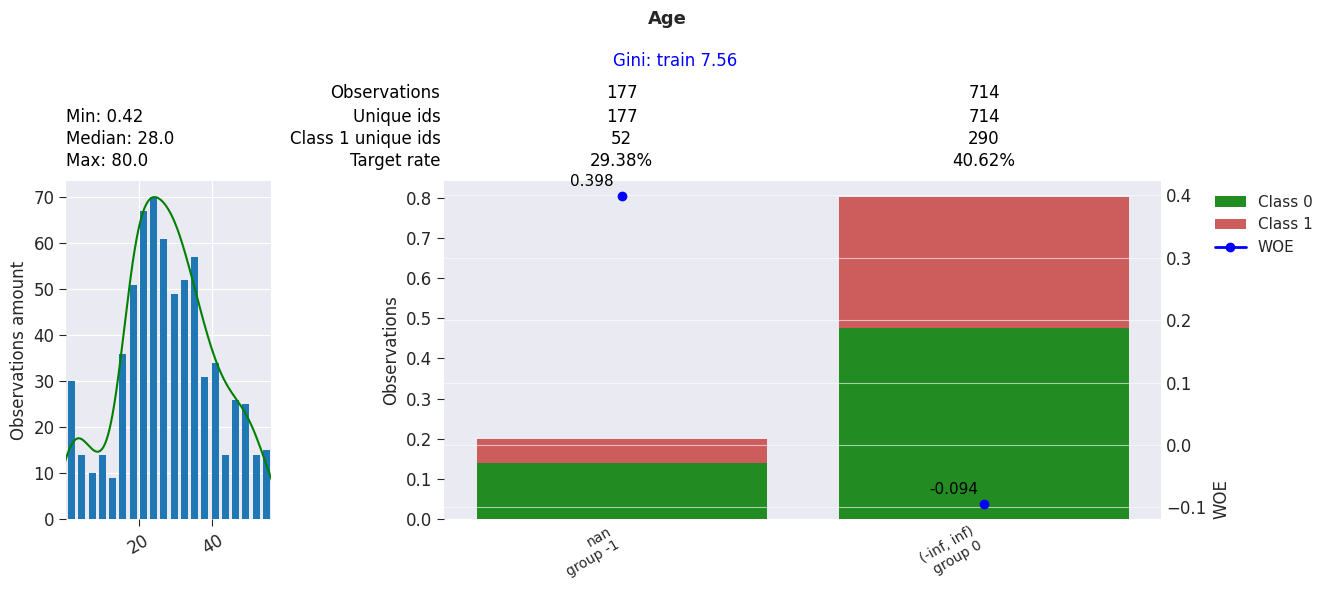

Iteration 4 (current)


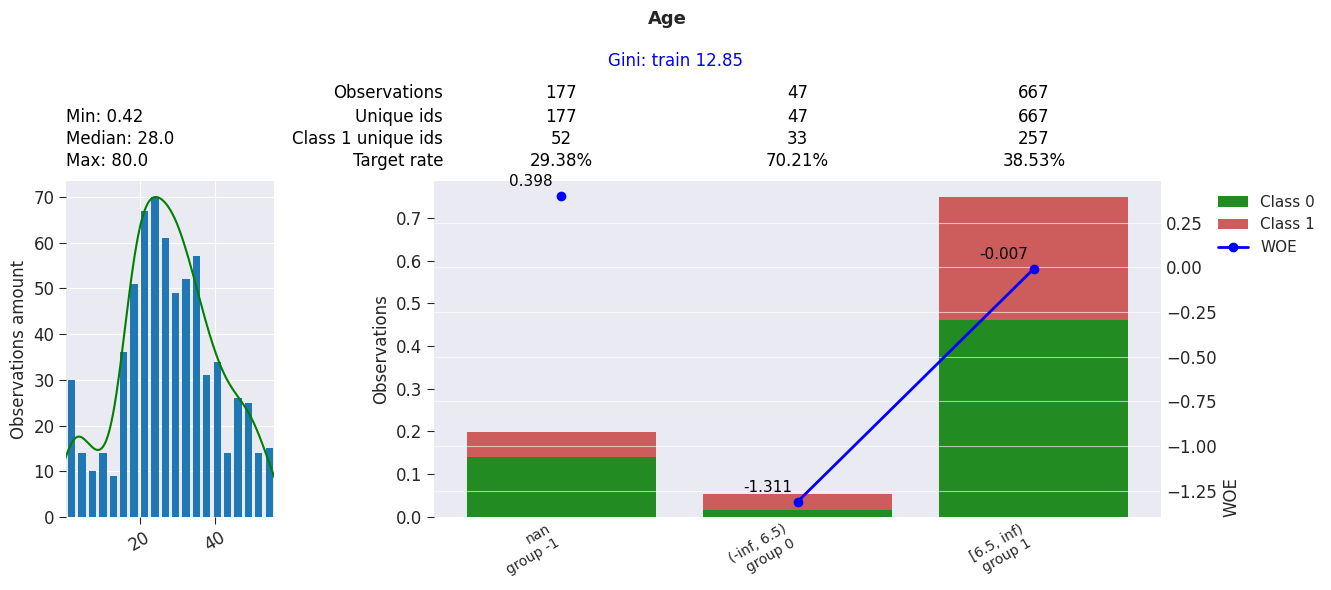

In [15]:
"""
Вывод истории биннинга одной переменной
:param feature: название переменной
"""
binning.show_history(feature='Age')

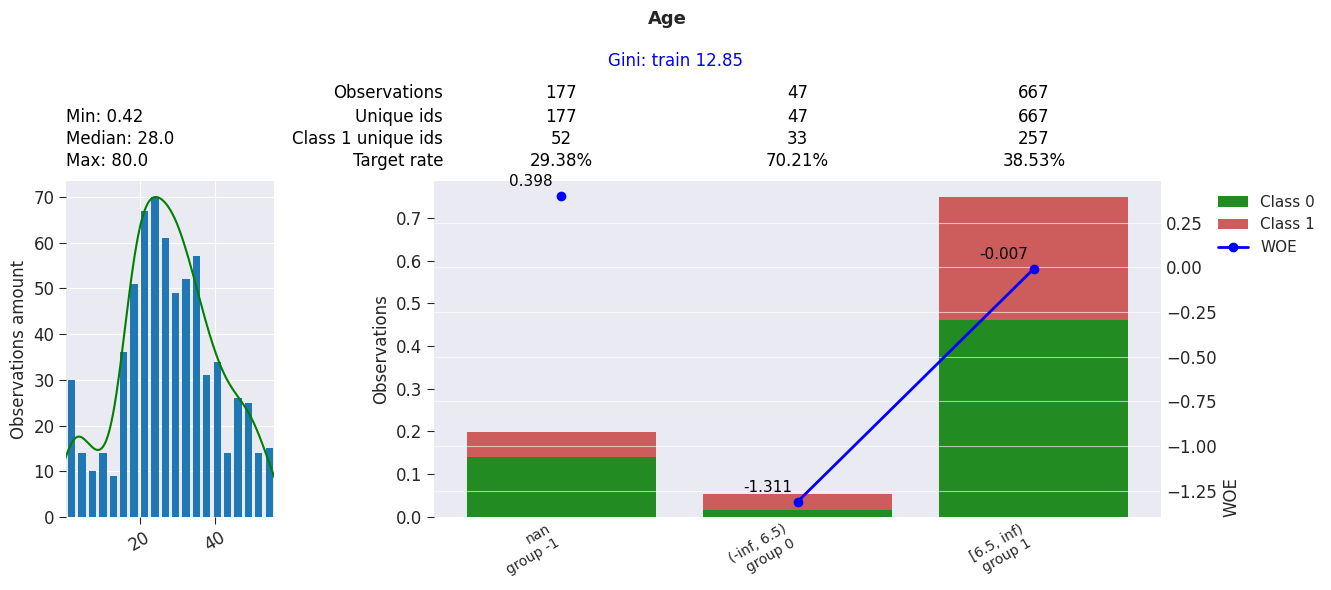

In [16]:
"""
Откат биннинга на одну из предыдущих итераций
:param feature: пемеренная
:param iteration: номер итерации. Возможны отрицательные значения: -1 - последняя итерация, -2 - предпоследняя и т.д.
:param plot_flag: флаг вывода графика после отката
"""
binning.rollback(feature='Age', iteration=None, plot_flag=True)        

In [17]:
"""
Трансформация ДатаСэмпла
:param ds: ДатаСэмпл
:param features: список переменных для трансформации. При None берутся ds.features для которых есть активный биннинг
:param verbose: флаг для вывода комментариев в процессе работы

:return: трансформированный ДатаСэмпл
"""
binning.transform(ds, features=None, verbose=False)        

In [18]:
"""
Сохранение биннинга в файл
:param out: название файла
:param features: список переменных для сохранения. При None сохраняются все, имеющие активный биннинг
:param full: если True, то добавляет в файл поля с доп статистикой по бинам
:param history: если True, то сохраняется вся история биннингов. Дубли биннингов удаляются, текущий биннинг записывается последней итерацией

:return: датафрейм со скоркартой
"""
scorecard = binning.export_scorecard(out=None, features=None, full=True, history=False)   
scorecard

,feature,categorical_type,group,values,woe,missing,n,n0,n1,target_rate,sample_part,n0_part,n1_part,iteration
0,PassengerId,,0,"[-inf, 183.5]",0.265,0,183.0,124.0,59.0,0.322,0.205,0.226,0.173,2.0
1,PassengerId,,1,"[183.5, inf]",-0.067,0,708.0,425.0,283.0,0.400,0.795,0.774,0.827,2.0
2,PassengerId,,others,all others,0.265,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,Pclass,int64,0,[3],0.664,0,491.0,372.0,119.0,0.242,0.551,0.678,0.348,2.0
4,Pclass,int64,1,[2],-0.365,0,184.0,97.0,87.0,0.473,0.207,0.177,0.254,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,cross_SibSp&Fare,"[int64, ]",others,all others,0.226,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,cross_Parch&PassengerId,"[int64, ]","[0, 0]","[0, 4, 5, 6] & [-inf, 461.5]",0.041,0,353.0,221.0,132.0,0.374,0.396,0.403,0.386,1.0
61,cross_Parch&PassengerId,"[int64, ]","[0, 1]","[0, 4, 5, 6] & [461.5, inf]",0.350,0,335.0,233.0,102.0,0.304,0.376,0.424,0.298,1.0
62,cross_Parch&PassengerId,"[int64, ]","[1, 0]","[2, 1, 3] & [-inf, inf]",-0.601,0,203.0,95.0,108.0,0.532,0.228,0.173,0.316,1.0


In [19]:
"""
Импорт биннинга из файла
:param scorecard: путь к эксель файлу или датафрейм с готовыми биннингами для импорта
:param features: список переменных для импорта биннинга. При None биннинг импортируется для всех, которые есть в файле
:param verbose: флаг для вывода комментариев в процессе работы
:param fit_flag: при True - WOE всех бинов перерасчитываются на текущей выборке
                 при False - WOE берутся из скоркарты. Если поле 'woe' в скоркарте отсутвует, то автоматически ставится fit_flag=True
"""
binning.import_scorecard(scorecard=scorecard, features=None, verbose=True, fit_flag=False)        

Replacing binning for PassengerId..

Current binning:
 group        values    woe   n  n1
     0 [-inf, 183.5]  0.265 183  59
     1  [183.5, inf] -0.067 708 283

Replacing binning for Pclass..

Current binning:
 group values    woe   n  n1
     0    [3]  0.664 491 119
     1    [2] -0.365 184  87
     2    [1] -1.001 216 136

Replacing binning for Sex..

Current binning:
 group     values    woe   n  n1
     0   ['male']  0.980 577 109
     1 ['female'] -1.526 314 233

Replacing binning for Age..

Current binning:
 group      values    woe   n  n1
    -1         nan  0.398 177  52
     0 [-inf, 6.5] -1.311  47  33
     1  [6.5, inf] -0.007 667 257

Replacing binning for SibSp..

Current binning:
 group          values    woe   n  n1
     0 [3, 4, 5, 8, 0]  0.226 654 217
     1          [1, 2] -0.583 237 125

Replacing binning for Parch..

Current binning:
 group       values    woe   n  n1
     0 [0, 4, 5, 6]  0.188 688 234
     1    [2, 1, 3] -0.601 203 108

Replacing binning for Far